In [21]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.metrics import mean_absolute_error, confusion_matrix, classification_report, accuracy_score,mean_squared_error



In [22]:
df1 = pd.read_csv('./Credit_Card.csv', delimiter=',')
df1.dataframeName = 'UCI_Credit_Card.csv'
nRow, nCol = df1.shape


In [23]:
defaulters = df1.copy()
print(defaulters.shape)
defaulters.head()

(30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [24]:
defaulters.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [25]:
defaulters.rename(columns={'default.payment.next.month':'def_pay'}, inplace=True)
defaulters.rename(columns={'PAY_0':'PAY_1'}, inplace=True)

In [26]:

defaulters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         30000 non-null  int64  
 1   LIMIT_BAL  30000 non-null  float64
 2   SEX        30000 non-null  int64  
 3   EDUCATION  30000 non-null  int64  
 4   MARRIAGE   30000 non-null  int64  
 5   AGE        30000 non-null  int64  
 6   PAY_1      30000 non-null  int64  
 7   PAY_2      30000 non-null  int64  
 8   PAY_3      30000 non-null  int64  
 9   PAY_4      30000 non-null  int64  
 10  PAY_5      30000 non-null  int64  
 11  PAY_6      30000 non-null  int64  
 12  BILL_AMT1  30000 non-null  float64
 13  BILL_AMT2  30000 non-null  float64
 14  BILL_AMT3  30000 non-null  float64
 15  BILL_AMT4  30000 non-null  float64
 16  BILL_AMT5  30000 non-null  float64
 17  BILL_AMT6  30000 non-null  float64
 18  PAY_AMT1   30000 non-null  float64
 19  PAY_AMT2   30000 non-null  float64
 20  PAY_AM

In [27]:
defaulters.isna().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
def_pay      0
dtype: int64

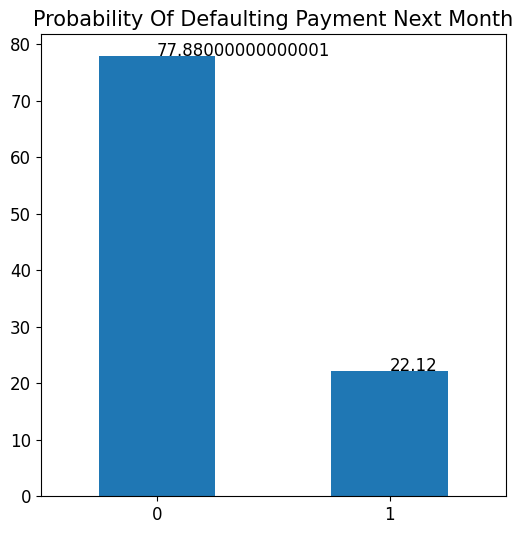

In [28]:
def_cnt = (defaulters.def_pay.value_counts(normalize=True)*100)
def_cnt.plot.bar(figsize=(6,6))
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title("Probability Of Defaulting Payment Next Month", fontsize=15)
for x,y in zip([0,1],def_cnt):
    plt.text(x,y,y,fontsize=12)
plt.show()

<ipython-input-29-412c96b82bf7>:2: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.

<ipython-input-29-412c96b82bf7>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-29-412c96b82bf7>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.githu

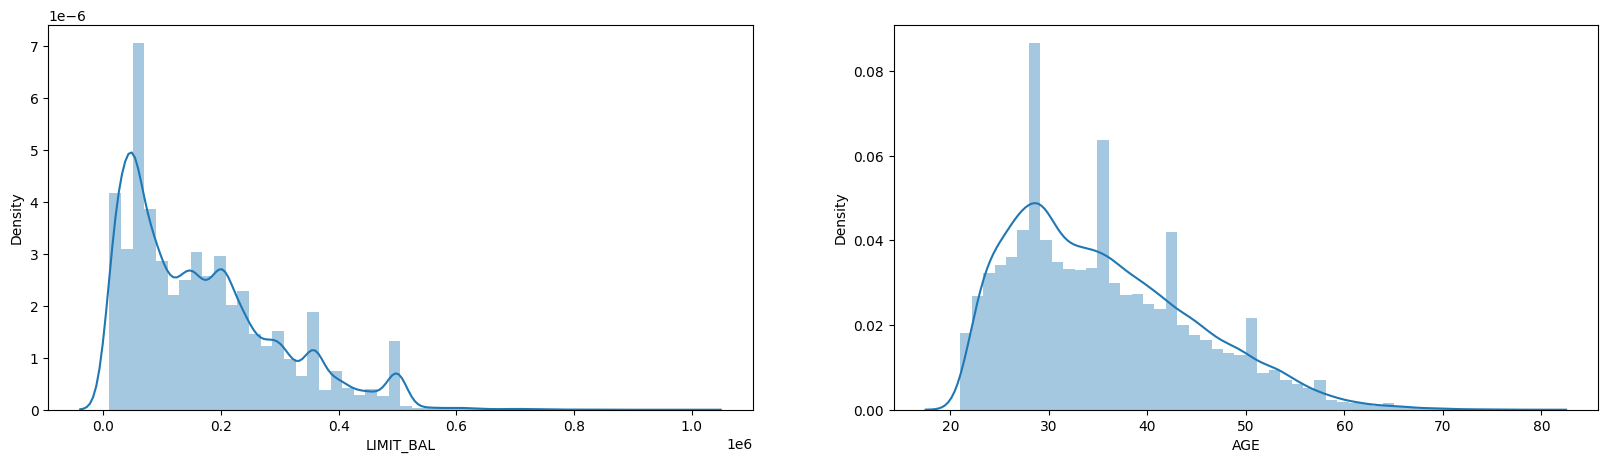

In [29]:
plt.subplots(figsize=(20,5))
plt.subplot(121)
sns.distplot(defaulters.LIMIT_BAL)

plt.subplot(122)
sns.distplot(defaulters.AGE)

plt.show()

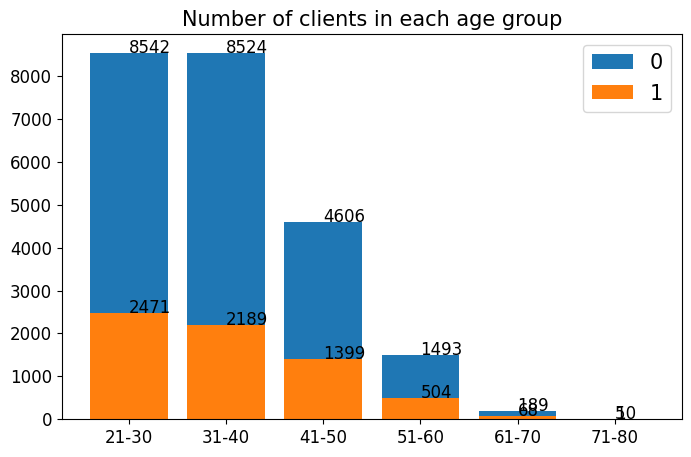

In [30]:
bins = [20,30,40,50,60,70,80]
names = ['21-30','31-40','41-50','51-60','61-70','71-80']
defaulters['AGE_BIN'] = pd.cut(x=defaulters.AGE, bins=bins, labels=names, right=True)

age_cnt = defaulters.AGE_BIN.value_counts()
age_0 = (defaulters.AGE_BIN[defaulters['def_pay'] == 0].value_counts())
age_1 = (defaulters.AGE_BIN[defaulters['def_pay'] == 1].value_counts())

plt.subplots(figsize=(8,5))
# sns.barplot(data=defaulters, x='AGE_BIN', y='LIMIT_BAL', hue='def_pay', ci=0)
plt.bar(age_0.index, age_0.values, label='0')
plt.bar(age_1.index, age_1.values, label='1')
for x,y in zip(names,age_0):
    plt.text(x,y,y,fontsize=12)
for x,y in zip(names,age_1):
    plt.text(x,y,y,fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Number of clients in each age group", fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()


<ipython-input-32-85b0e5b74da8>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



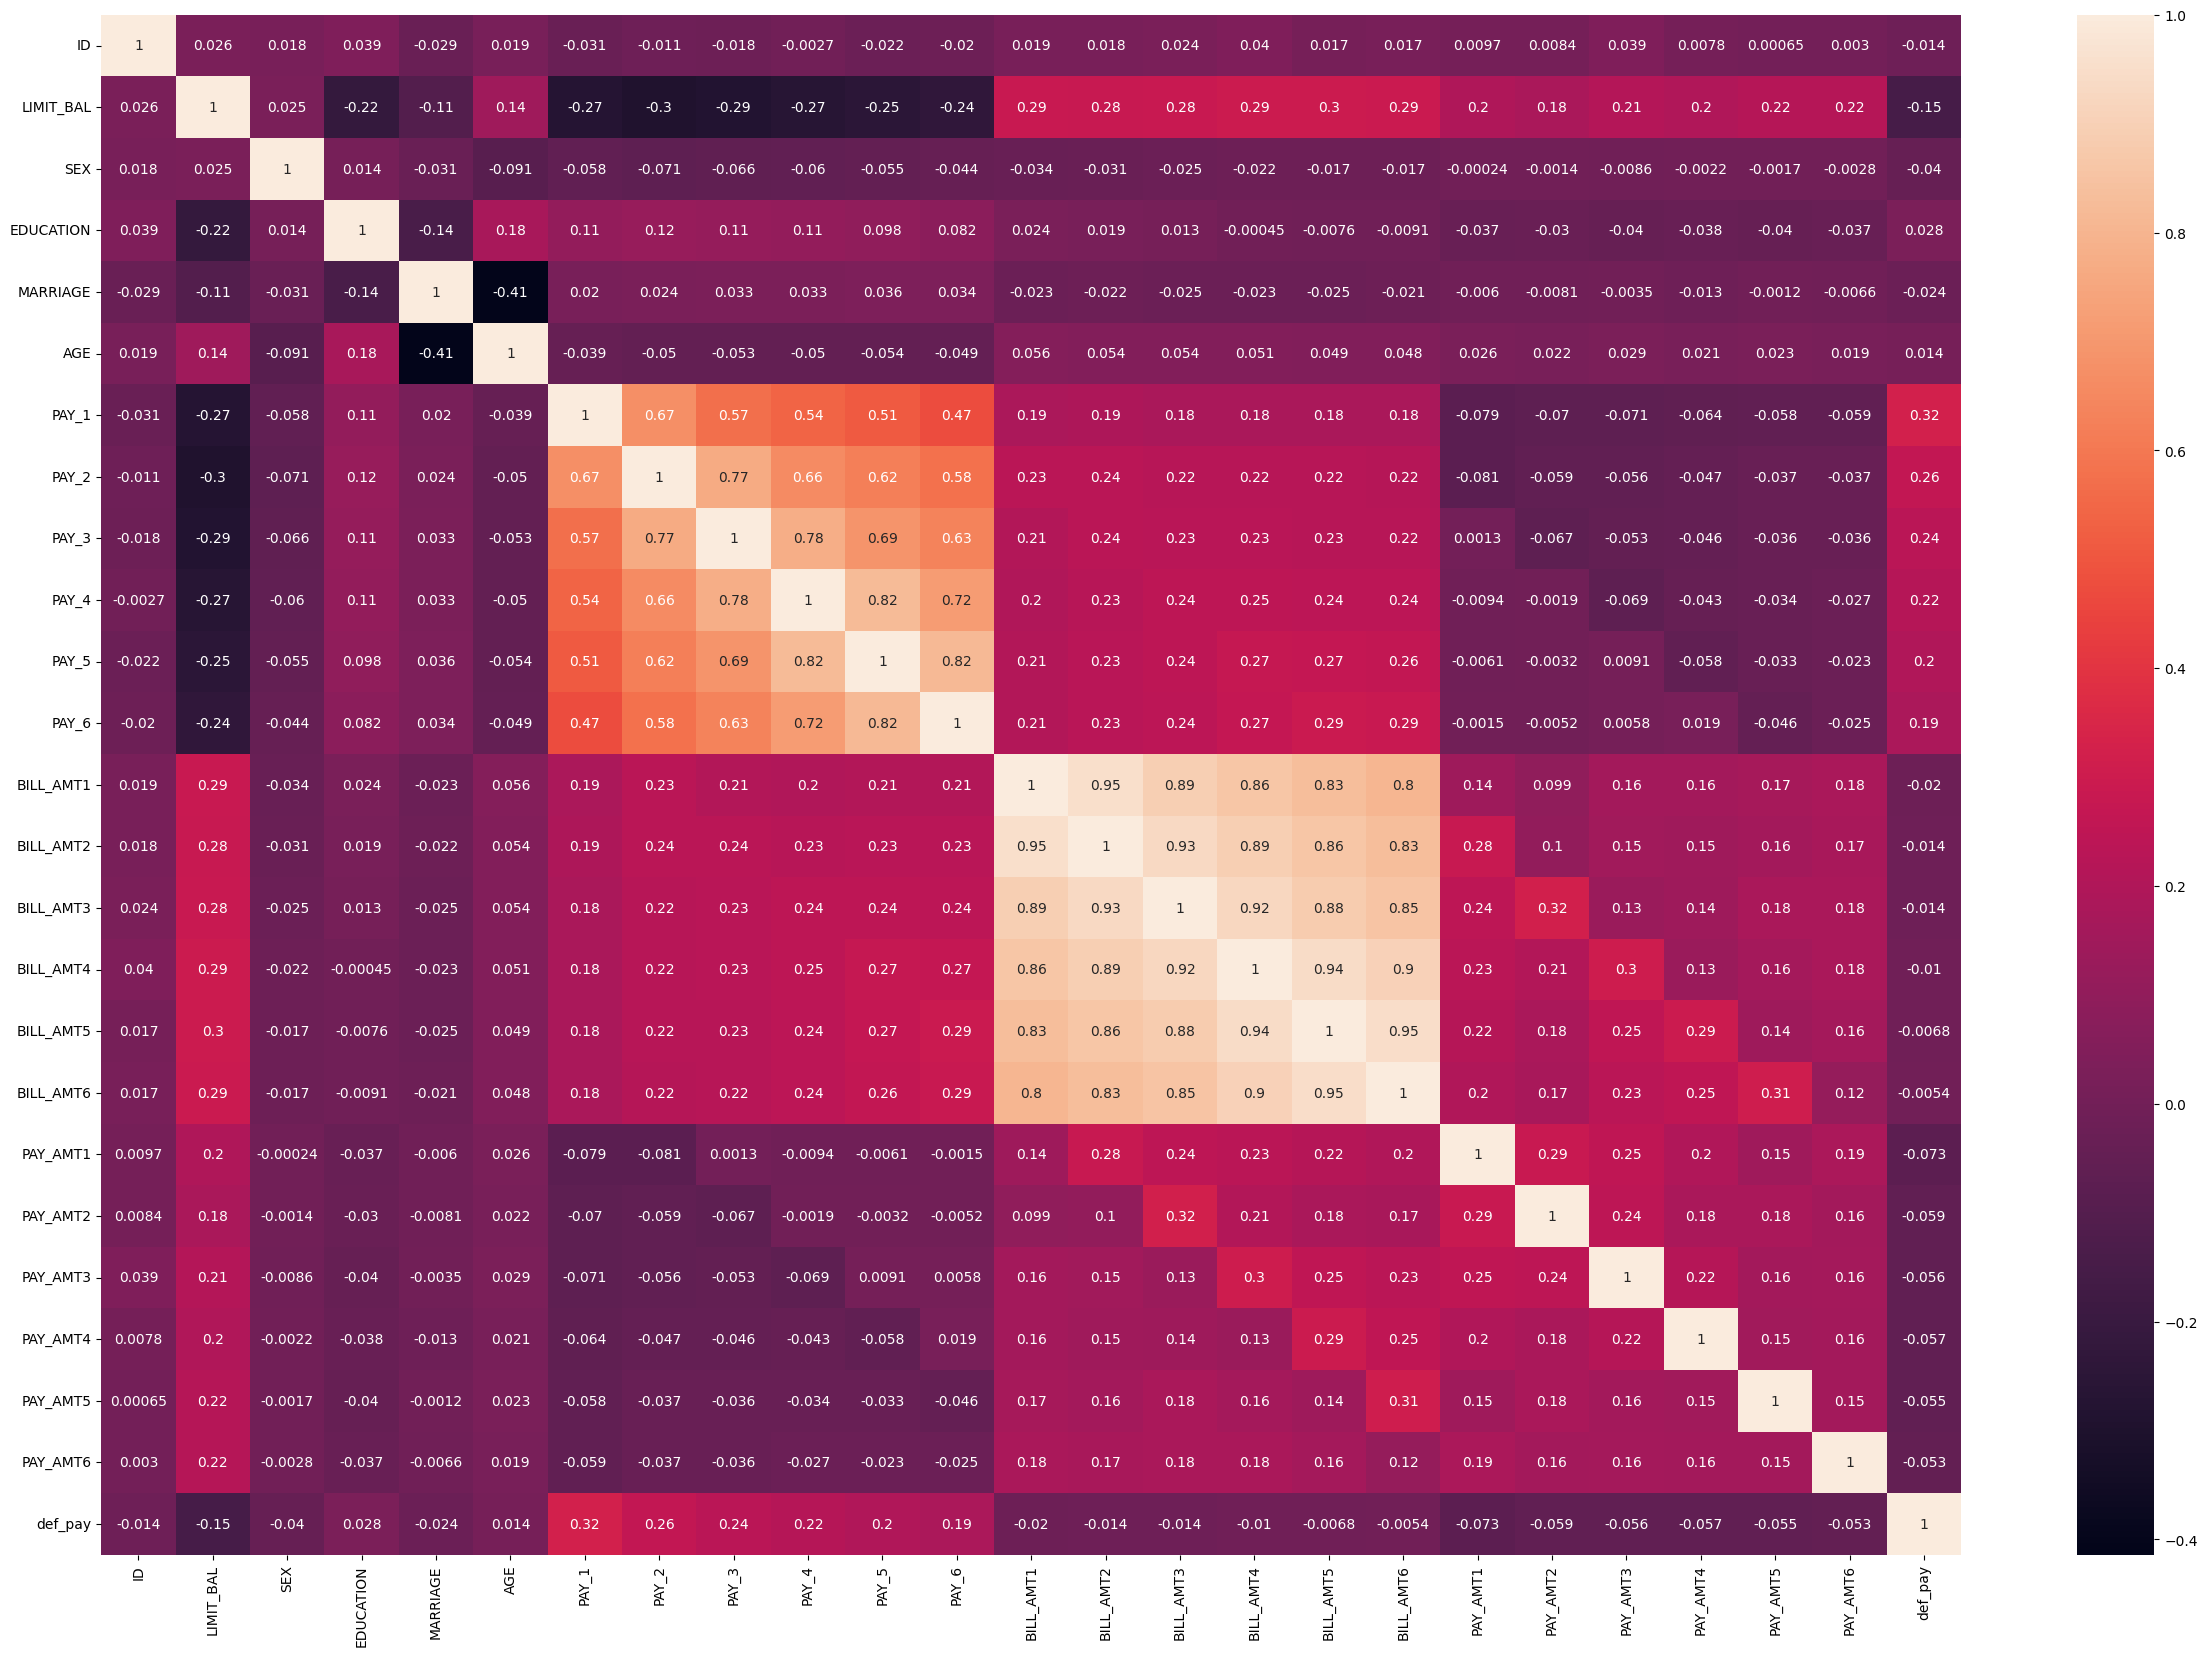

In [32]:
plt.subplots(figsize=(30,20))
sns.heatmap(defaulters.corr(), annot=True)
plt.show()

In [33]:
defaulters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   ID         30000 non-null  int64   
 1   LIMIT_BAL  30000 non-null  float64 
 2   SEX        30000 non-null  int64   
 3   EDUCATION  30000 non-null  int64   
 4   MARRIAGE   30000 non-null  int64   
 5   AGE        30000 non-null  int64   
 6   PAY_1      30000 non-null  int64   
 7   PAY_2      30000 non-null  int64   
 8   PAY_3      30000 non-null  int64   
 9   PAY_4      30000 non-null  int64   
 10  PAY_5      30000 non-null  int64   
 11  PAY_6      30000 non-null  int64   
 12  BILL_AMT1  30000 non-null  float64 
 13  BILL_AMT2  30000 non-null  float64 
 14  BILL_AMT3  30000 non-null  float64 
 15  BILL_AMT4  30000 non-null  float64 
 16  BILL_AMT5  30000 non-null  float64 
 17  BILL_AMT6  30000 non-null  float64 
 18  PAY_AMT1   30000 non-null  float64 
 19  PAY_AMT2   30000 non-null

<h2>Logistic Regression</h2>

In [34]:
from sklearn.linear_model import LogisticRegression

df_X = defaulters.drop(['def_pay','AGE_BIN'], axis=1)
df_y = defaulters.def_pay

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=10)


logistic_regression_model = LogisticRegression(random_state=0)
logistic_regression_model.fit(X_train, y_train)
preds = logistic_regression_model.predict(X_test)

print("The mean absolute error:\n{}\n".format(mean_absolute_error(y_test, preds)))

logistic_regression_model_accuracy = accuracy_score(y_test, preds)
print("Accuracy score:\n{}\n".format(logistic_regression_model_accuracy))
accuracies = pd.DataFrame({"Algorithm":"Logistic Regression", "Score": [logistic_regression_model_accuracy]})


print("Classification report: \n{}\n".format(classification_report(y_test, preds)))

print("Confusion matrix: \n{}\n".format(confusion_matrix(y_test, preds)))

The mean absolute error:
0.21983333333333333

Accuracy score:
0.7801666666666667

Classification report: 
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4683
           1       0.00      0.00      0.00      1317

    accuracy                           0.78      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.61      0.78      0.68      6000


Confusion matrix: 
[[4681    2]
 [1317    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



 <h2>Naive Bayes</h2>


In [35]:
from sklearn.naive_bayes import GaussianNB

df_X = defaulters.drop(['def_pay','AGE_BIN'], axis=1)
df_y = defaulters.def_pay

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=10)

naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)
preds = naive_bayes_model.predict(X_test)


print("The mean absolute error:\n{}\n".format(mean_absolute_error(y_test, preds)))

naive_bayes_model_accuracy = accuracy_score(y_test, preds)

print("Accuracy score:\n{}\n".format(naive_bayes_model_accuracy))

accuracies.loc[len(accuracies)] = {"Algorithm" :"Naive Bayes", "Score": naive_bayes_model_accuracy}
print(accuracies)
print("Classification report: \n{}\n".format(classification_report(y_test, preds)))

print("Confusion matrix: \n{}\n".format(confusion_matrix(y_test, preds)))

The mean absolute error:
0.6205

Accuracy score:
0.3795

             Algorithm     Score
0  Logistic Regression  0.780167
1          Naive Bayes  0.379500
Classification report: 
              precision    recall  f1-score   support

           0       0.87      0.24      0.38      4683
           1       0.24      0.87      0.38      1317

    accuracy                           0.38      6000
   macro avg       0.56      0.56      0.38      6000
weighted avg       0.73      0.38      0.38      6000


Confusion matrix: 
[[1133 3550]
 [ 173 1144]]



<h2>Random Forest</h2>

In [36]:

from sklearn.ensemble import RandomForestClassifier


df_X = defaulters.drop(['def_pay','AGE_BIN'], axis=1)
df_y = defaulters.def_pay

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=10)

random_forest_model = RandomForestClassifier(n_estimators=200, criterion="gini")
random_forest_model.fit(X_train, y_train)
preds = random_forest_model.predict(X_test)


print("The mean absolute error:\n{}\n".format(mean_absolute_error(y_test, preds)))
random_forest_model_accuracy = accuracy_score(y_test, preds)
print("Accuracy score:\n{}\n".format(random_forest_model_accuracy))

accuracies.loc[len(accuracies)] = {"Algorithm":"Random Forest", "Score":random_forest_model_accuracy}
print(accuracies)
print("Classification report: \n{}\n".format(classification_report(y_test, preds)))
print("Confusion matrix: \n{}\n".format(confusion_matrix(y_test, preds)))


The mean absolute error:
0.17933333333333334

Accuracy score:
0.8206666666666667

             Algorithm     Score
0  Logistic Regression  0.780167
1          Naive Bayes  0.379500
2        Random Forest  0.820667
Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4683
           1       0.66      0.37      0.47      1317

    accuracy                           0.82      6000
   macro avg       0.75      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000


Confusion matrix: 
[[4438  245]
 [ 831  486]]



<h2> Decision Tree </h2>

In [37]:
from sklearn.tree import DecisionTreeClassifier

df_X = defaulters.drop(['def_pay','AGE_BIN'], axis=1)
df_y = defaulters.def_pay

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=10)

decision_tree_model = DecisionTreeClassifier(criterion="gini", random_state=0)
decision_tree_model.fit(X_train, y_train)
preds = decision_tree_model.predict(X_test)


print("The mean absolute error:\n{}\n".format(mean_absolute_error(y_test, preds)))

decision_tree_model_accuracy = accuracy_score(y_test, preds)
print("Accuracy score:\n{}\n".format(decision_tree_model_accuracy))
accuracies.loc[len(accuracies)]  = {"Algorithm":"Decision Tree", "Score":decision_tree_model_accuracy}
print(accuracies)

print("Classification report: \n{}\n".format(classification_report(y_test, preds)))

print("Confusion matrix: \n{}\n".format(confusion_matrix(y_test, preds)))


The mean absolute error:
0.2738333333333333

Accuracy score:
0.7261666666666666

             Algorithm     Score
0  Logistic Regression  0.780167
1          Naive Bayes  0.379500
2        Random Forest  0.820667
3        Decision Tree  0.726167
Classification report: 
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      4683
           1       0.39      0.42      0.40      1317

    accuracy                           0.73      6000
   macro avg       0.61      0.62      0.61      6000
weighted avg       0.74      0.73      0.73      6000


Confusion matrix: 
[[3802  881]
 [ 762  555]]



<h2> KNN </h2>

In [38]:
from sklearn.neighbors import KNeighborsClassifier

df_X = defaulters.drop(['def_pay','AGE_BIN'], axis=1)
df_y = defaulters.def_pay

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=10)

knn_model = KNeighborsClassifier(n_neighbors=20, metric="minkowski")
knn_model.fit(X_train, y_train)
preds = knn_model.predict(X_test)


print("The mean absolute error:\n{}\n".format(mean_absolute_error(y_test, preds)))

knn_model_accuracy = accuracy_score(y_test, preds)
print("Accuracy score:\n{}\n".format(knn_model_accuracy))
accuracies.loc[len(accuracies)] = {"Algorithm":"KNN", "Score":knn_model_accuracy}
print(accuracies)
print("Classification report: \n{}\n".format(classification_report(y_test, preds)))

print("Confusion matrix: \n{}\n".format(confusion_matrix(y_test, preds)))

The mean absolute error:
0.221

Accuracy score:
0.779

             Algorithm     Score
0  Logistic Regression  0.780167
1          Naive Bayes  0.379500
2        Random Forest  0.820667
3        Decision Tree  0.726167
4                  KNN  0.779000
Classification report: 
              precision    recall  f1-score   support

           0       0.79      0.98      0.87      4683
           1       0.48      0.07      0.13      1317

    accuracy                           0.78      6000
   macro avg       0.63      0.52      0.50      6000
weighted avg       0.72      0.78      0.71      6000


Confusion matrix: 
[[4579  104]
 [1222   95]]



<h2>SVM Classifier </h2>

In [39]:

from sklearn.svm import SVC

df_X = defaulters.drop(['def_pay','AGE_BIN'], axis=1)
df_y = defaulters.def_pay

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=10)


svm_model = SVC(random_state=0)
svm_model.fit(X_train, y_train)
preds = svm_model.predict(X_test)


print("The mean absolute error:\n{}\n".format(mean_absolute_error(y_test, preds)))

svm_model_accuracy = accuracy_score(y_test, preds)
print("Accuracy score:\n{}\n".format(svm_model_accuracy))
accuracies.loc[len(accuracies)] = {"Algorithm":"SVM", "Score":svm_model_accuracy}
print(accuracies)
print("Classification report: \n{}\n".format(classification_report(y_test, preds)))

print("Confusion matrix: \n{}\n".format(confusion_matrix(y_test, preds)))


The mean absolute error:
0.2195

Accuracy score:
0.7805

             Algorithm     Score
0  Logistic Regression  0.780167
1          Naive Bayes  0.379500
2        Random Forest  0.820667
3        Decision Tree  0.726167
4                  KNN  0.779000
5                  SVM  0.780500
Classification report: 
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4683
           1       0.00      0.00      0.00      1317

    accuracy                           0.78      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.61      0.78      0.68      6000


Confusion matrix: 
[[4683    0]
 [1317    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



# Results

In [40]:
plt.figure(figsize=(20, 10))
print(accuracies)
fig = px.bar(data_frame=accuracies, x="Algorithm", y="Score", title="Accuracy Score of Various Algorithms", range_y=[0.1, 1.0],)
fig.update_traces(marker={"color": "red", "opacity": 0.6, "line": {"width": 4, "color": "black"}})
fig.show()

             Algorithm     Score
0  Logistic Regression  0.780167
1          Naive Bayes  0.379500
2        Random Forest  0.820667
3        Decision Tree  0.726167
4                  KNN  0.779000
5                  SVM  0.780500


<Figure size 2000x1000 with 0 Axes>